# Analysis of Google App's rating 

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:>

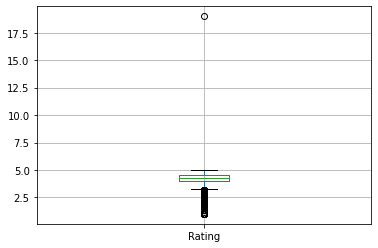

In [6]:
df.boxplot()


array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

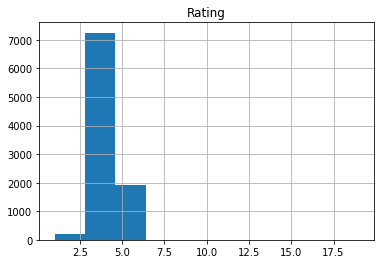

In [7]:
df.hist()


<AxesSubplot:>

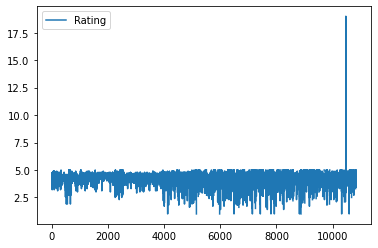

In [8]:
df.plot()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Data Cleaning 

In [10]:
df.isnull().head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().tail(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10821,False,False,True,False,False,False,False,False,False,False,False,False,False
10822,False,False,True,False,False,False,False,False,False,False,False,False,False
10823,False,False,True,False,False,False,False,False,False,False,False,False,False
10824,False,False,True,False,False,False,False,False,False,False,False,False,False
10825,False,False,True,False,False,False,False,False,False,False,False,False,False
10826,False,False,False,False,False,False,False,False,False,False,False,False,False
10827,False,False,False,False,False,False,False,False,False,False,False,False,False
10828,False,False,False,False,False,False,False,False,False,False,False,False,False
10829,False,False,False,False,False,False,False,False,False,False,False,False,False
10830,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum() #geeting null value count in the data frame 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [13]:
df[df.Rating > 5]     # OR    df[df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [14]:
df.drop([10472], axis = 0, inplace = True)

In [15]:
df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,10-Feb-17,0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,5-Aug-14,3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,7-Aug-18,6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,21-Nov-14,2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,17-May-17,0.0.9,2.3 and up


In [16]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,25-Jul-18,Varies with device,Varies with device


In [17]:
df.index = [np.arange(1,10841)] #changing the index of the data frame

In [18]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
3,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
4,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
5,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


<AxesSubplot:>

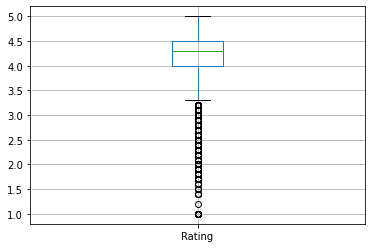

In [19]:
df.boxplot() #plotting the dataframe for more insight 

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

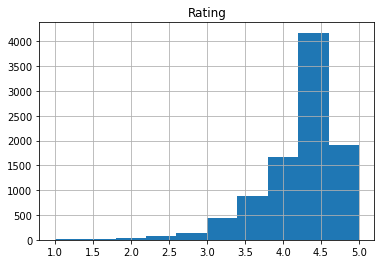

In [20]:
df.hist() #plotting the histogram to get data insight 

In [21]:
df[df.duplicated()] # checking duplicated value present in the dataframe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
230,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,26-Feb-18,Varies with device,4.0.3 and up
237,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,31-Jul-18,Varies with device,Varies with device
240,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,24-Jul-18,2.19.0.204537701,4.4 and up
257,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,20-Jul-18,4.1.28165.0716,4.0 and up
262,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,16-Jul-18,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8644,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,6-Apr-18,Varies with device,Varies with device
8655,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,6-Aug-18,Varies with device,Varies with device
8659,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,27-Jun-18,Varies with device,Varies with device
10050,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,1-Jun-18,0.6.88,5.0 and up


In [22]:
df[df['App'] == 'Google My Business'] # Checking the duplicate in dataframe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
194,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,24-Jul-18,2.19.0.204537701,4.4 and up
240,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,24-Jul-18,2.19.0.204537701,4.4 and up
269,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,24-Jul-18,2.19.0.204537701,4.4 and up


In [23]:
df.drop_duplicates(subset = ['App'] , keep = 'first', inplace = True ) # removing the duplicate value

In [24]:
df.shape

(9659, 13)

In [25]:
df.index = [np.arange(1,9660)] # reindexing the column index 

# Remove Column that are 90% empty

In [26]:
threshold = len(df)*0.1 # threshold meanse alest this many values in the column should be non- NA
threshold

965.9000000000001

In [27]:
df.dropna(axis = 1 , thresh = threshold, inplace = True )

# threshold meanse alest this many values in the column should be non- NA
# it will drop those column where non-NA rows in that column are less than 965.900..... i.e. threshold 
# in this data frame it is this step is not required as we have sufficient data in each row

In [28]:
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

# Data Imputation and data manipulation

Fill Null values with appropriate values using aggregrate function such as Mean, Median and Mode

Mode - Categorical data  

Median - Numerical data (as Data Set is right skewed)

In [29]:
#define a function impute median 
def impute_median(series):
    return series.fillna(series.median())

In [30]:
df.Rating = df['Rating'].transform(impute_median)

In [31]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [32]:
# mode of categorical values 
print(df['Type'].mode())
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

#here all values are unimodel

0    Free
Name: Type, dtype: object
0    Varies with device
Name: Current Ver, dtype: object
0    4.1 and up
Name: Android Ver, dtype: object


In [33]:
# filling NUll values with the mode values as mode of all the columnn is 1 i.e. Unimodel Values[0] id that value of mode
df['Type'].fillna(str(df['Type'].mode().values[0]), inplace = True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]), inplace =True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]), inplace =True)

In [34]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# let's convert price, ratings and reviews in numerical values 

In [35]:
df["Price"] = df["Price"].apply(lambda x : str(x).replace('$' , '') if '$' in str(x) else str(x))
df["Price"] = df["Price"].apply(lambda x : float(x))
df['Reviews'] = pd.to_numeric(df['Reviews'], errors ='coerce' )

In [36]:
df["Installs"] = df["Installs"].apply(lambda x : str(x). replace('+','') if '+' in str(x) else str(x))
df["Installs"] = df["Installs"].apply(lambda x : str(x). replace(',','') if ',' in str(x) else str(x))
df["Installs"] = df["Installs"].apply(lambda x : float(x))

In [37]:
#summary Stats 

df.describe()

,Rating,Reviews,Installs,Price
count,9659.000000,9.659000e+03,9.659000e+03,9659.000000
mean,4.192442,2.165926e+05,7.777507e+06,1.099299
std,0.496397,1.831320e+06,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


## Data Visualization 

In [38]:
grp = df.groupby('Category')
ratin = grp['Rating'].agg(np.mean)
price = grp['Price'].agg(np.sum)
reviews = grp['Reviews'].agg(np.mean)

print(ratin)
print("\n")
print(price)
print("\n")
print(reviews)

Category
ART_AND_DESIGN         4.354687
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.334234
BUSINESS               4.173810
COMICS                 4.185714
COMMUNICATION          4.154921
DATING                 4.041520
EDUCATION              4.363866
ENTERTAINMENT          4.135294
EVENTS                 4.395313
FAMILY                 4.194378
FINANCE                4.138551
FOOD_AND_DRINK         4.192857
GAME                   4.249948
HEALTH_AND_FITNESS     4.251736
HOUSE_AND_HOME         4.174324
LIBRARIES_AND_DEMO     4.207143
LIFESTYLE              4.131436
MAPS_AND_NAVIGATION    4.062595
MEDICAL                4.202025
NEWS_AND_MAGAZINES     4.156693
PARENTING              4.300000
PERSONALIZATION        4.325532
PHOTOGRAPHY            4.166548
PRODUCTIVITY           4.206150
SHOPPING               4.237624
SOCIAL                 4.255230
SPORTS                 4.232923
TOOLS                  4.073881
TRAVEL_AND_LOCAL       4.103196

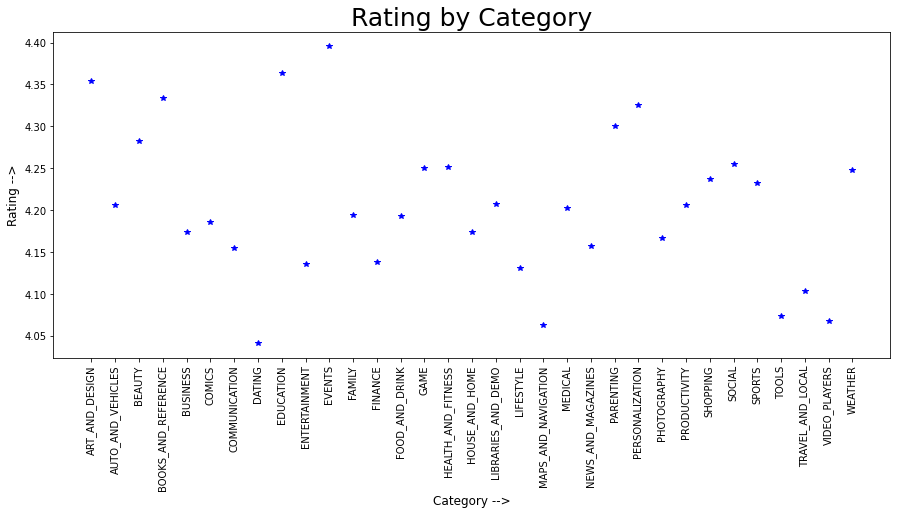

In [39]:
plt.figure(figsize = (15,6))
plt.plot(ratin, '*' , color='blue')
plt.xticks(rotation = 90)
plt.title("Rating by Category", fontsize =25)
plt.xlabel("Category -->", fontsize = 12)
plt.ylabel("Rating -->", fontsize = 12)

plt.show()

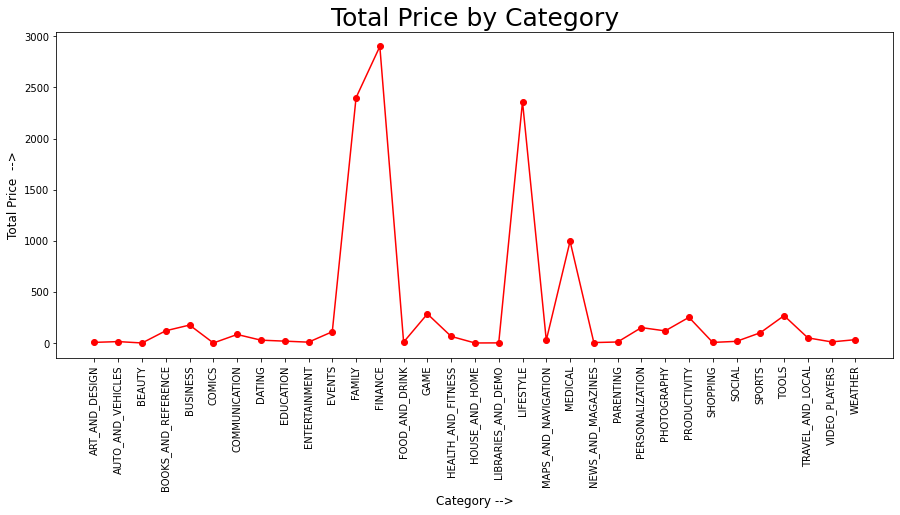

In [40]:
plt.figure(figsize = (15,6))
plt.plot(price, 'o-' , color='red')
plt.xticks(rotation = 90)
plt.title("Total Price by Category", fontsize =25)
plt.xlabel("Category -->", fontsize = 12)
plt.ylabel("Total Price  -->", fontsize = 12)

plt.show()

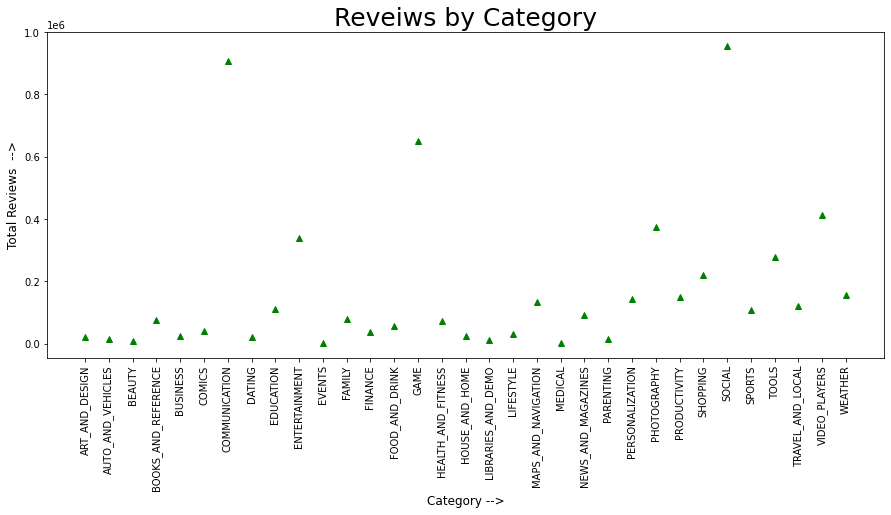

In [41]:
plt.figure(figsize = (15,6))
plt.plot(reviews, '^' , color='green')
plt.xticks(rotation=90)
plt.title("Reveiws by Category", fontsize =25)
plt.xlabel("Category -->", fontsize = 12)
plt.ylabel("Total Reviews  -->", fontsize = 12)

plt.show()